In [7]:
from boolean_networks import bn
import pickle, random
from boolean_networks.gene_network import GeneNetwork
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

n = 1000
bns = [None] * n
n_genes = 5
predictors = 2

In [4]:
for i in range(n):
    n_vars = random.choices(range(1, predictors+1), k=n_genes)
    bns[i] = bn.generate_bn(n_genes, n_vars)

file = open("../outputs/statisticTest/bns_5.obj",  "wb")
pickle.dump(bns, file)
file.close()

Max regulation power: 0.9600238261993469
Min regulation power: 0.0
[1809  182  298  245  211  195  177  464  185  134  175  128  228  165
  146  259]
[0.         0.06000149 0.12000298 0.18000447 0.24000596 0.30000745
 0.36000893 0.42001042 0.48001191 0.5400134  0.60001489 0.66001638
 0.72001787 0.78001936 0.84002085 0.90002234 0.96002383]


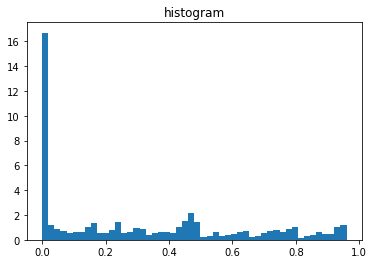

In [38]:
booleanNetworksFile = open("../outputs/statisticTest/bns_5.obj",  "rb")
bns = pickle.load(booleanNetworksFile)
booleanNetworksFile.close()

# rp = np.zeros((1000, 5))
rp = [0]
gns = [None] * 1000
perturbation = 0.01

for i in range(1000):
    n_genes = bns[i].n_genes
    gns[i] = GeneNetwork(n_genes, perturbation, bns[i].f_vars, bns[i].funcs)
    # rp[i, 0:n_genes] = gns[i].get_reg_power(range(n_genes), range(n_genes), predictors, gns[i].get_steady_state())
    rp.extend(gns[i].get_reg_power(range(n_genes), range(n_genes), predictors, gns[i].get_steady_state()))

# print("Saving data to file")
# geneNetworksFile = open("../outputs/statisticTest/gns_5_1000.obj",  "wb")
# pickle.dump(gns, geneNetworksFile)
# geneNetworksFile.close()

print("Max regulation power: " + str(np.amax(rp)))
print("Min regulation power: " + str(np.amin(rp)))
# df = pd.DataFrame(rp)
# df.to_excel('../outputs/statisticTest/reg_power_5_1000.xlsx')

hist, bin_edges = np.histogram(rp, bins='auto')
print(hist)
print(bin_edges)
# Plot histogram of the reg power
plt.hist(rp, bins='auto', density=1)
plt.title("histogram") 
plt.show()

In [2]:
file = open("../outputs/statisticTest/gns_5_1000.obj", "rb")
gns = pickle.load(file)
print(len(gns))
file.close()

1000
